In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
full_dataset = pd.concat(objs = [train, test], axis = 0).reset_index(drop = True)

C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


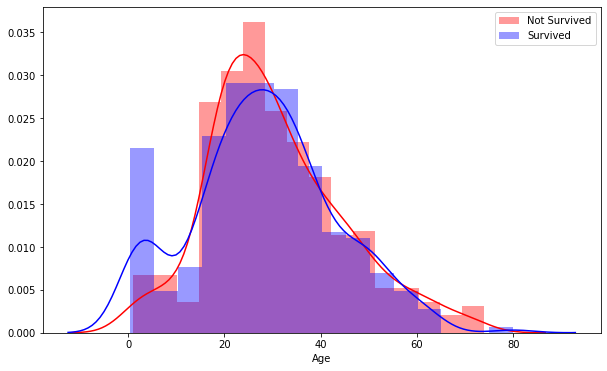

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.distplot(full_dataset['Age'][(full_dataset['Age'].notnull()) & (full_dataset['Survived']==0)], color = 'r', ax = ax)
sns.distplot(full_dataset['Age'][(full_dataset['Age'].notnull()) & (full_dataset['Survived']==1)], color = 'b', ax = ax)

plt.legend(['Not Survived', 'Survived'])

In [5]:
def age_classify(x):
    return int(x//10)

In [11]:
full_dataset['n_Age'] = full_dataset['Age'][full_dataset['Age'].notnull()].apply(age_classify)

In [12]:
full_dataset['n_Age'].value_counts()

2    568
3    243
4    163
1    143
0     82
5     70
6     32
7      7
8      1
Name: n_Age, dtype: int64

In [8]:
age_by_pclass_sex = full_dataset.groupby(['Sex', 'Pclass']).median()['Age']

In [9]:
print(age_by_pclass_sex)

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64


In [10]:
for i in full_dataset['Age'].index[full_dataset['Age'].isnull()]:
    full_dataset['Age'][i] = age_by_pclass_sex.loc[(full_dataset['Sex'][i], full_dataset['Pclass'][i])]
full_dataset['n_Age'] = full_dataset['Age'][full_dataset['Age'].notnull()].apply(age_classify)

C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


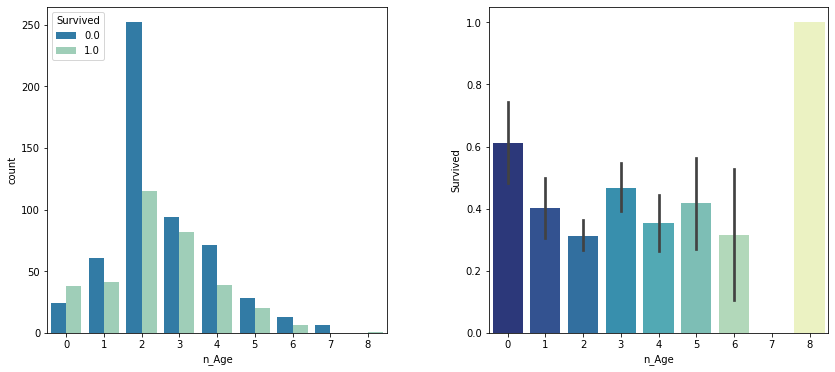

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

g1 = sns.countplot( x = 'n_Age', hue = 'Survived', data = full_dataset, palette = 'YlGnBu_r', ax = ax[0])
g2 = sns.factorplot( x = 'n_Age', y = 'Survived', data = full_dataset, palette = 'YlGnBu_r', ax = ax[1], kind = 'bar')

plt.close(g2.fig)
plt.subplots_adjust(wspace = 0.3)

In [14]:
full_dataset['Embarked'] = full_dataset['Embarked'].fillna('S')

In [17]:
fare_by_fam_sex = full_dataset.groupby(['Parch', 'SibSp', 'Sex']).median()['Age']

Parch  SibSp  Sex   
0      0      female    24.0
              male      27.0
       1      female    29.0
              male      29.0
       2      female    22.0
              male      25.0
       3      female    31.5
              male      31.0
1      0      female    23.0
              male      36.0
       1      female    27.0
              male      25.0
       2      female     5.0
              male      12.0
       3      female    22.0
              male      15.5
       4      male       7.0
2      0      female    24.0
              male      11.0
       1      female    22.0
              male      25.0
       2      female    19.5
              male      15.5
       3      female    23.0
              male      10.0
       4      female     9.0
              male       5.0
       5      female    13.0
              male      10.0
       8      female    22.0
              male      25.0
3      0      female    30.0
       1      female    48.0
              male    

In [22]:
full_dataset['Fare'].fillna(fare_by_fam_sex.loc[(0, 0, 'male')])

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64

In [23]:
full_dataset['Deck'] = full_dataset['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

In [24]:
deck_group = full_dataset.groupby(['Deck', 'Pclass']).count()

In [25]:
print(deck_group)

             Age  Cabin  Embarked  Fare  Name  Parch  PassengerId  Sex  SibSp  \
Deck Pclass                                                                     
A    1        22     22        22    22    22     22           22   22     22   
B    1        65     65        65    65    65     65           65   65     65   
C    1        94     94        94    94    94     94           94   94     94   
D    1        40     40        40    40    40     40           40   40     40   
     2         6      6         6     6     6      6            6    6      6   
E    1        34     34        34    34    34     34           34   34     34   
     2         4      4         4     4     4      4            4    4      4   
     3         3      3         3     3     3      3            3    3      3   
F    2        13     13        13    13    13     13           13   13     13   
     3         8      8         8     8     8      8            8    8      8   
G    3         5      5     